In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
data = pd.read_csv('credit_data.csv')
data.head(10)

,Assets_Total,Cash,Debt_in_Current_Liabilities_Total,Long_Term_Debt_Total,Earnings_Before_Interest,Gross_Profit_(Loss),Liabilities_Total,Retained_Earnings,Total_debt/total_asset,total_asset/total_libiilities,...,Employees,Inventories_Total,Earnings_Per_Share_from_Operations,Revenue_Total,Operating_Activities_Net_Cash_Flow,Financing_Activities_Net_Cash_Flow,Net_Cash_Flow,ID,Year,Rating
0,43771.000,994.000,1708.000,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,113.300,1004.000,5.37,42650.000,3080.000,-315.000,2765.000,1,2014,4
1,14313.532,7.604,530.970,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,6.366,255.986,3.54,3491.632,1099.627,-178.881,920.746,2,2014,1
2,41275.000,4063.000,4437.000,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,77.000,2643.000,1.57,20247.000,3675.000,-2742.000,933.000,3,2014,1
3,2210.772,466.829,0.000,0.000,134.767,308.828,165.461,1759.236,0.000000,13.361288,...,1.635,149.402,2.61,660.235,133.583,-45.802,87.781,4,2014,3
4,53402.100,1420.400,729.300,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,48.800,0.000,6.46,58003.200,3372.800,-1235.000,2137.800,5,2014,1
5,17779.100,336.600,1294.000,4824.500,2560.600,3761.300,9970.500,8751.300,0.271358,1.783170,...,21.200,861.400,5.84,10439.000,2187.100,-661.400,1525.700,6,2014,1
6,6181.000,107.000,117.000,686.000,1226.000,1733.000,4054.000,1834.000,0.110985,1.524667,...,13.952,58.000,4.33,5368.000,1030.000,-462.000,568.000,7,2014,2
7,38578.000,2444.000,68.000,5919.000,5486.000,6709.000,16258.000,18642.000,0.153429,2.372863,...,3.045,527.000,5.73,10737.000,4464.000,-3835.000,629.000,8,2014,2
8,10738.114,192.516,0.000,594.532,320.692,320.692,9492.988,891.267,0.055367,1.131163,...,2.579,7.711,3.26,1340.030,237.644,-175.883,61.761,9,2014,1
9,919.855,22.971,3.828,390.825,114.072,181.062,668.518,85.615,0.424877,1.375961,...,1.800,0.000,2.00,447.411,71.369,366.793,438.162,10,2014,3


### Data processing 

In [3]:
data.isnull().sum() #check missing value

Assets_Total                              0
Cash                                      9
Debt_in_Current_Liabilities_Total         0
Long_Term_Debt_Total                      0
Earnings_Before_Interest                  0
Gross_Profit_(Loss)                       0
Liabilities_Total                         0
Retained_Earnings                         1
Total_debt/total_asset                    0
total_asset/total_libiilities             0
EBTI/total_asset                          0
gross_profit/rev                          0
EBTI/REV                                  0
Dividends_per_Share_Pay_Date_Calendar     4
Sales/Turnover_(Net)                      0
Stockholders_Equity_Total                 0
Interest_and_Related_Expense_Total        1
Market_Value_Total_Fiscal                92
Book_Value_Per_Share                      1
Common_Equity_Liquidation_Value           0
Comprehensive_Income_Parent               1
Employees                                 2
Inventories_Total               

In [4]:
#drop observations with missing value - total of 108 observations 
data_clean = data.dropna()
print(data_clean.isnull().sum())

Assets_Total                             0
Cash                                     0
Debt_in_Current_Liabilities_Total        0
Long_Term_Debt_Total                     0
Earnings_Before_Interest                 0
Gross_Profit_(Loss)                      0
Liabilities_Total                        0
Retained_Earnings                        0
Total_debt/total_asset                   0
total_asset/total_libiilities            0
EBTI/total_asset                         0
gross_profit/rev                         0
EBTI/REV                                 0
Dividends_per_Share_Pay_Date_Calendar    0
Sales/Turnover_(Net)                     0
Stockholders_Equity_Total                0
Interest_and_Related_Expense_Total       0
Market_Value_Total_Fiscal                0
Book_Value_Per_Share                     0
Common_Equity_Liquidation_Value          0
Comprehensive_Income_Parent              0
Employees                                0
Inventories_Total                        0
Earnings_Pe

In [5]:
data_clean.duplicated().sum() #check duplication

0

In [6]:
data_clean.dtypes #check data types

Assets_Total                             float64
Cash                                     float64
Debt_in_Current_Liabilities_Total        float64
Long_Term_Debt_Total                     float64
Earnings_Before_Interest                 float64
Gross_Profit_(Loss)                      float64
Liabilities_Total                        float64
Retained_Earnings                        float64
Total_debt/total_asset                   float64
total_asset/total_libiilities            float64
EBTI/total_asset                         float64
gross_profit/rev                         float64
EBTI/REV                                 float64
Dividends_per_Share_Pay_Date_Calendar    float64
Sales/Turnover_(Net)                     float64
Stockholders_Equity_Total                float64
Interest_and_Related_Expense_Total       float64
Market_Value_Total_Fiscal                float64
Book_Value_Per_Share                     float64
Common_Equity_Liquidation_Value          float64
Comprehensive_Income

In [7]:
#rename columns
data_clean = data_clean.rename(columns={"Gross_Profit_(Loss)": "Gross_Profit_Loss",
                                        "Total_debt/total_asset": "Total_debt_over_total_asset",
                                        "total_asset/total_libiilities": "total_asset_over_total_liabilities",
                                        "Sales/Turnover_(Net)": "Sales_over_Turnover_Net",
                                        "EBTI/REV": "EBTI_over_REV",
                                        "EBTI/total_asset": "EBTI_over_total_asset",
                                        "gross_profit/rev": "gross_profit_over_rev"})

In [8]:
#seperate dataset into 3 dataset train, validation and test
from sklearn.model_selection import train_test_split

target_y = data_clean['Rating']
features_x = data_clean.loc[:, data_clean.columns != 'Rating']

X_train, X_test, y_train, y_test = train_test_split(features_x, target_y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### EDA

In [9]:
data_clean.iloc[:,0:16].describe().round(2)

,Assets_Total,Cash,Debt_in_Current_Liabilities_Total,Long_Term_Debt_Total,Earnings_Before_Interest,Gross_Profit_Loss,Liabilities_Total,Retained_Earnings,Total_debt_over_total_asset,total_asset_over_total_liabilities,EBTI_over_total_asset,gross_profit_over_rev,EBTI_over_REV,Dividends_per_Share_Pay_Date_Calendar,Sales_over_Turnover_Net,Stockholders_Equity_Total
count,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00,2595.00
mean,24885.34,1232.16,1700.01,5232.95,1976.84,3497.64,18744.89,4036.16,0.55,2.73,-0.96,1.00,0.19,0.87,10420.69,6109.19
std,90390.21,4434.70,12470.47,12471.30,4843.27,8289.59,80655.63,18349.86,9.87,57.26,54.49,33.42,0.36,1.47,23211.92,15027.16
min,104.03,0.00,0.00,0.00,-21913.00,-21536.00,98.83,-82378.00,0.00,0.27,-2775.85,-7.49,-8.01,0.00,0.10,-11476.00
25%,2359.65,76.75,5.00,746.34,232.74,424.90,1527.84,-154.12,0.22,1.27,0.08,0.22,0.12,0.00,1388.11,624.59
50%,5636.39,267.27,53.83,1742.12,589.80,1103.34,3665.48,664.10,0.32,1.52,0.11,0.35,0.19,0.52,3422.18,1829.81
75%,16846.35,879.71,396.30,4877.16,1802.05,2966.89,10898.40,3055.38,0.44,1.82,0.15,0.51,0.30,1.32,9429.44,5264.00
max,1792077.00,121711.00,273479.00,245649.00,81730.00,104126.00,1565934.00,389427.00,502.89,2918.44,1.45,1702.79,0.93,43.40,364763.00,226143.00


In [10]:
data_clean.iloc[:,16:].describe().round(4)

,Interest_and_Related_Expense_Total,Market_Value_Total_Fiscal,Book_Value_Per_Share,Common_Equity_Liquidation_Value,Comprehensive_Income_Parent,Employees,Inventories_Total,Earnings_Per_Share_from_Operations,Revenue_Total,Operating_Activities_Net_Cash_Flow,Financing_Activities_Net_Cash_Flow,Net_Cash_Flow,ID,Year,Rating
count,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000,2595.0000
mean,249.5246,17472.7784,23.2906,5797.0112,623.2513,27.8848,1847.9278,5.8212,10420.3155,1665.9950,-337.0332,1328.9612,446.6798,2014.6782,2.5726
std,518.3017,42046.9034,187.7262,14451.4422,2681.9877,167.9257,13796.9533,179.7319,23212.0967,4514.7721,3634.0506,4726.9533,260.5914,0.4672,0.9925
min,0.0000,12.8586,-121.5912,-13244.0000,-23119.0000,0.0000,0.0000,-55.6100,-982.1230,-16571.0000,-89131.0000,-89375.0000,1.0000,2014.0000,1.0000
25%,40.1415,1532.6388,6.4713,585.6590,-3.1820,2.7280,14.3640,0.5750,1388.1070,166.0565,-402.6000,83.9455,220.0000,2014.0000,2.0000
50%,93.5920,4411.0360,13.9982,1723.2000,135.0000,8.2000,219.5000,1.9600,3422.1810,446.0000,-78.3900,319.0000,444.0000,2015.0000,3.0000
75%,233.0000,14594.1331,26.4534,4951.2000,516.5500,23.7425,802.1260,3.6500,9429.4360,1362.5000,92.8455,1100.0565,672.0000,2015.0000,3.0000
max,9482.0000,615336.4559,9382.3300,205867.0000,51967.0000,8195.0465,341053.0000,9153.4600,364763.0000,81266.0000,33443.4000,82224.0000,901.0000,2015.0000,4.0000


In [11]:
stats.describe(data_clean['Rating'])

DescribeResult(nobs=2595, minmax=(1, 4), mean=2.572639691714836, variance=0.9849874395187945, skewness=-0.031027822542402064, kurtosis=-1.0506326481779555)

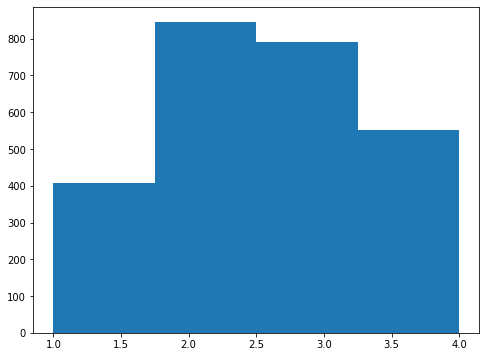

In [12]:
plt.figure(figsize=(8,6))
plt.hist(data_clean['Rating'], bins=4)
plt.show()

In [13]:
#variables the potentially have outliers 
variables = data_clean.columns
kurtosis = stats.kurtosis(data_clean)
var_outlier = variables[np.absolute(kurtosis) > 7]
len(var_outlier)

28

In [14]:
#skewness
neg_outlier = variables[stats.skew(data_clean) < -2]
pos_outlier = variables[stats.skew(data_clean) > 2]
neg_outlier, pos_outlier

(Index(['EBTI_over_total_asset', 'EBTI_over_REV',
        'Financing_Activities_Net_Cash_Flow'],
       dtype='object'),
 Index(['Assets_Total', 'Cash', 'Debt_in_Current_Liabilities_Total',
        'Long_Term_Debt_Total', 'Earnings_Before_Interest', 'Gross_Profit_Loss',
        'Liabilities_Total', 'Retained_Earnings', 'Total_debt_over_total_asset',
        'total_asset_over_total_liabilities', 'gross_profit_over_rev',
        'Dividends_per_Share_Pay_Date_Calendar', 'Sales_over_Turnover_Net',
        'Stockholders_Equity_Total', 'Interest_and_Related_Expense_Total',
        'Market_Value_Total_Fiscal', 'Book_Value_Per_Share',
        'Common_Equity_Liquidation_Value', 'Comprehensive_Income_Parent',
        'Employees', 'Inventories_Total', 'Earnings_Per_Share_from_Operations',
        'Revenue_Total', 'Operating_Activities_Net_Cash_Flow'],
       dtype='object'))

#### Correlation

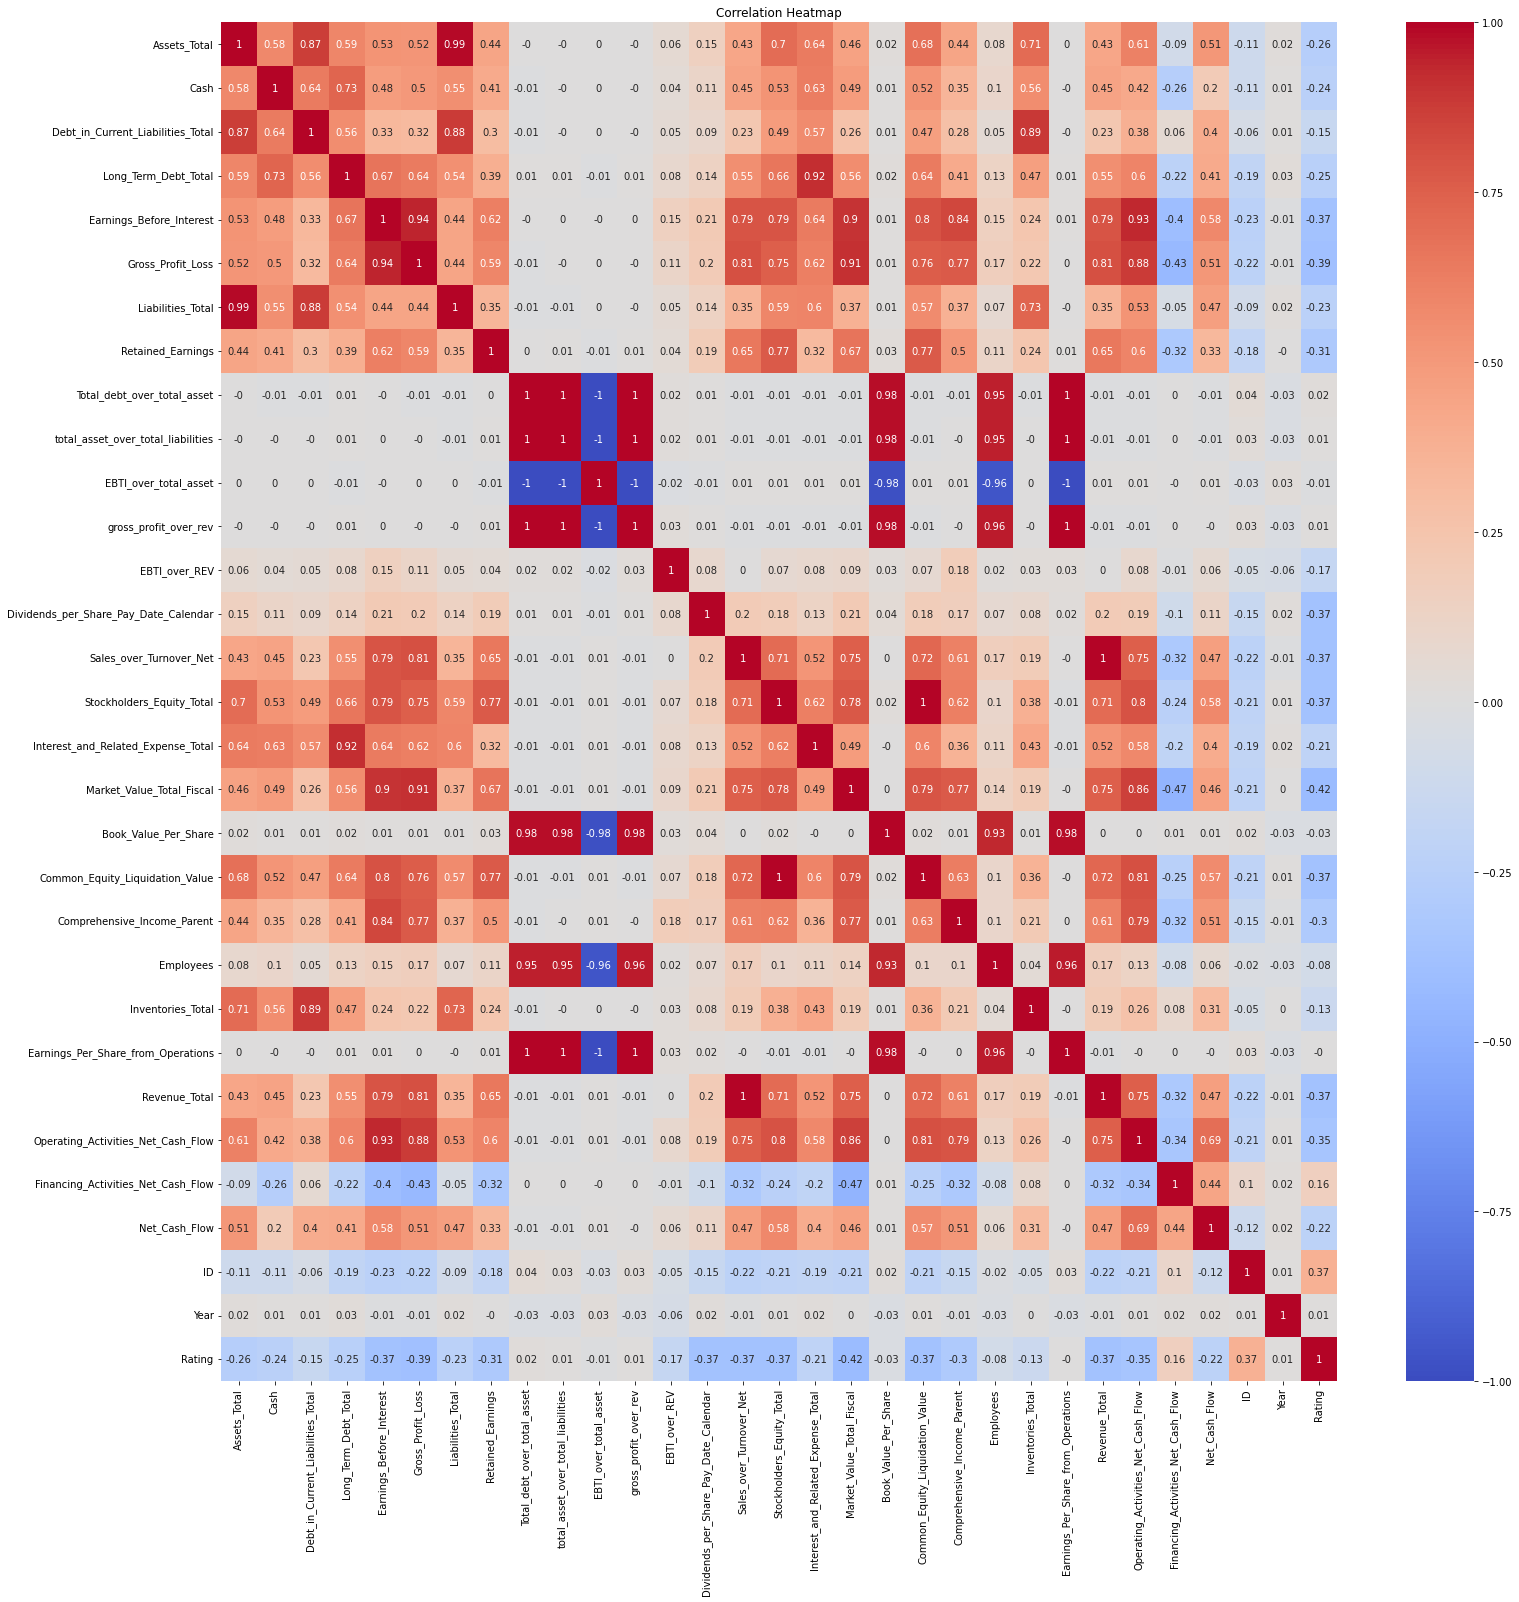

In [15]:
# calculate pairwise correlations
corr_matrix = data_clean.corr()

# plot correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation heatmap.png')
plt.show()

In [16]:
corr_matrix['Rating'].abs().sort_values(ascending = False).round(4).head(11)

Rating                                   1.0000
Market_Value_Total_Fiscal                0.4207
Gross_Profit_Loss                        0.3850
Common_Equity_Liquidation_Value          0.3733
Stockholders_Equity_Total                0.3725
Earnings_Before_Interest                 0.3713
ID                                       0.3695
Revenue_Total                            0.3661
Sales_over_Turnover_Net                  0.3661
Dividends_per_Share_Pay_Date_Calendar    0.3652
Operating_Activities_Net_Cash_Flow       0.3517
Name: Rating, dtype: float64

#### Pairplot

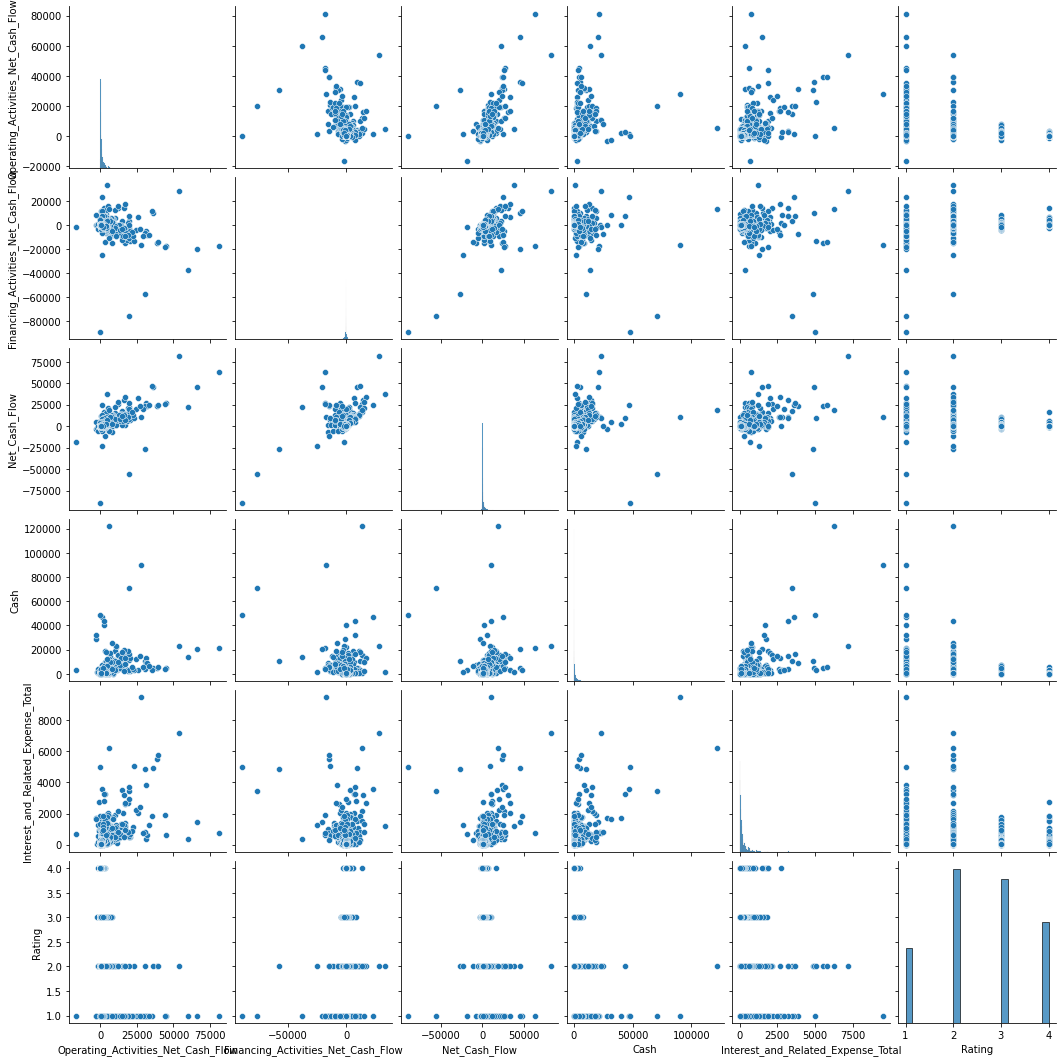

In [17]:
#set of variables related to CFs
variables1 = ['Operating_Activities_Net_Cash_Flow',
       'Financing_Activities_Net_Cash_Flow', 'Net_Cash_Flow', 'Cash', 'Interest_and_Related_Expense_Total', 'Rating']
sns.pairplot(data_clean[variables1])

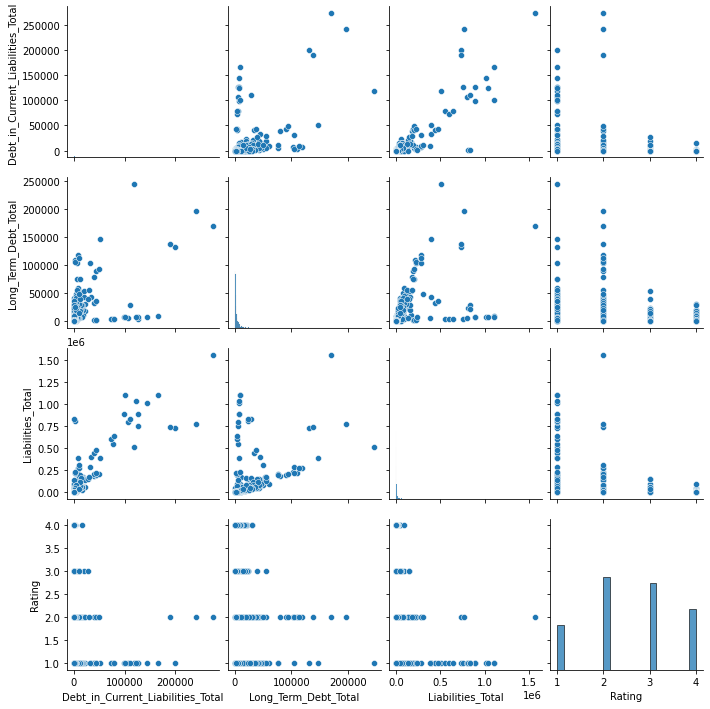

In [18]:
#set of variables related to liabilities
variables2 = ['Debt_in_Current_Liabilities_Total',
       'Long_Term_Debt_Total', 'Liabilities_Total','Rating']
sns.pairplot(data_clean[variables2])

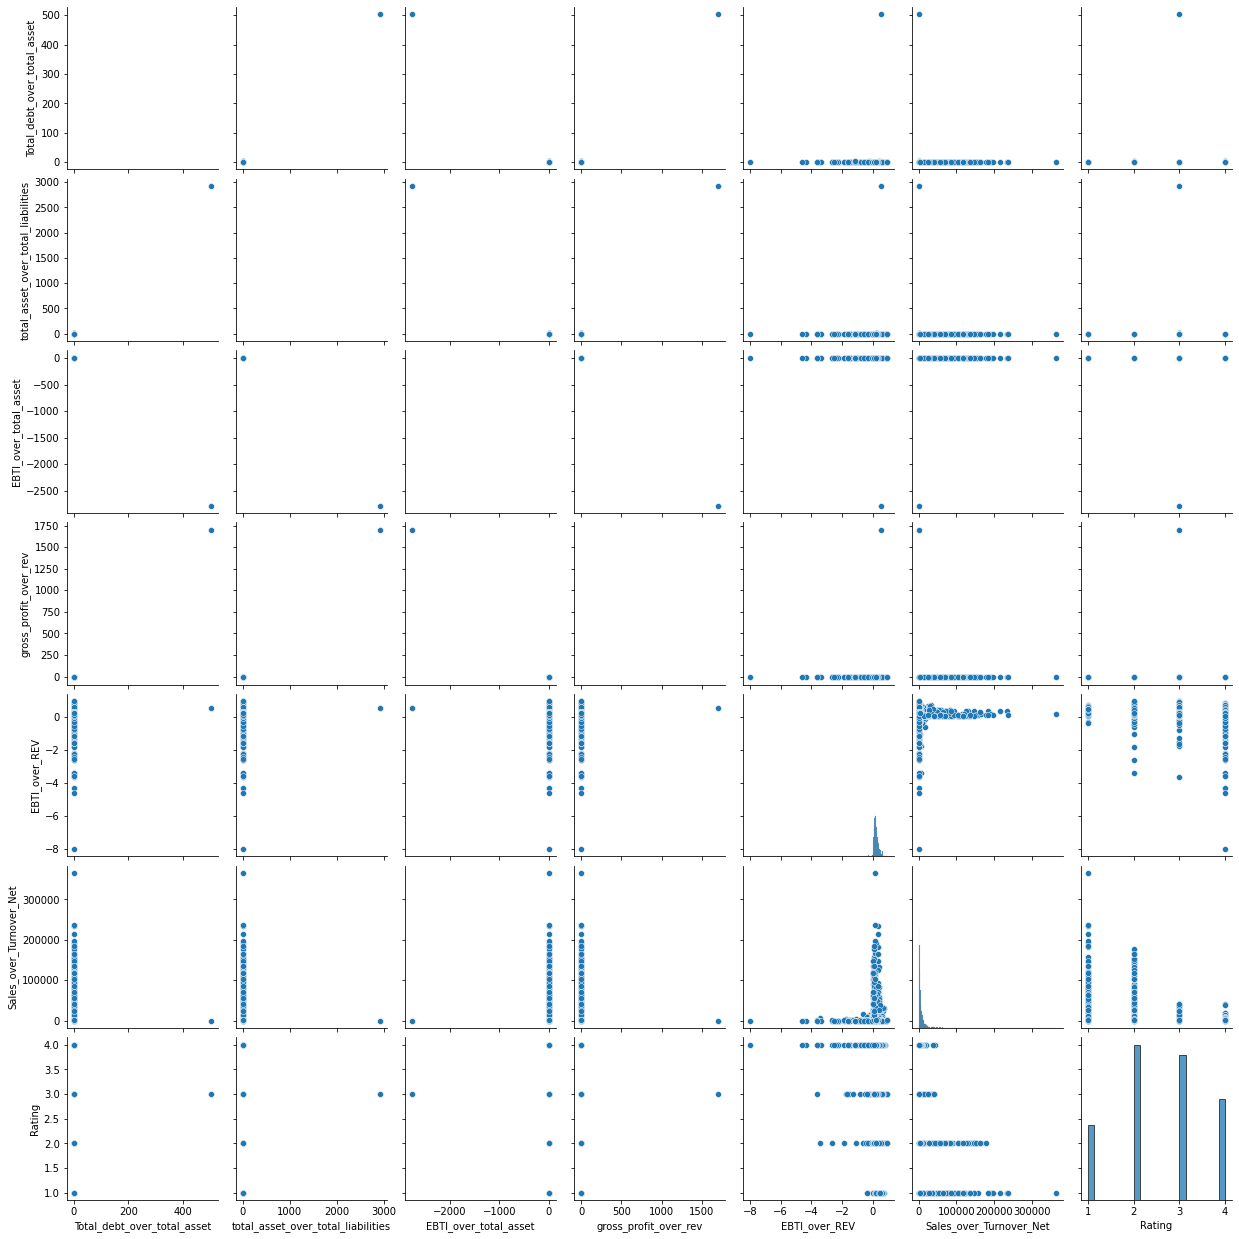

In [19]:
#ratio_set of variable
variables3 = ['Total_debt_over_total_asset',
       'total_asset_over_total_liabilities', 'EBTI_over_total_asset',
       'gross_profit_over_rev', 'EBTI_over_REV','Sales_over_Turnover_Net','Rating']
sns.pairplot(data_clean[variables3])

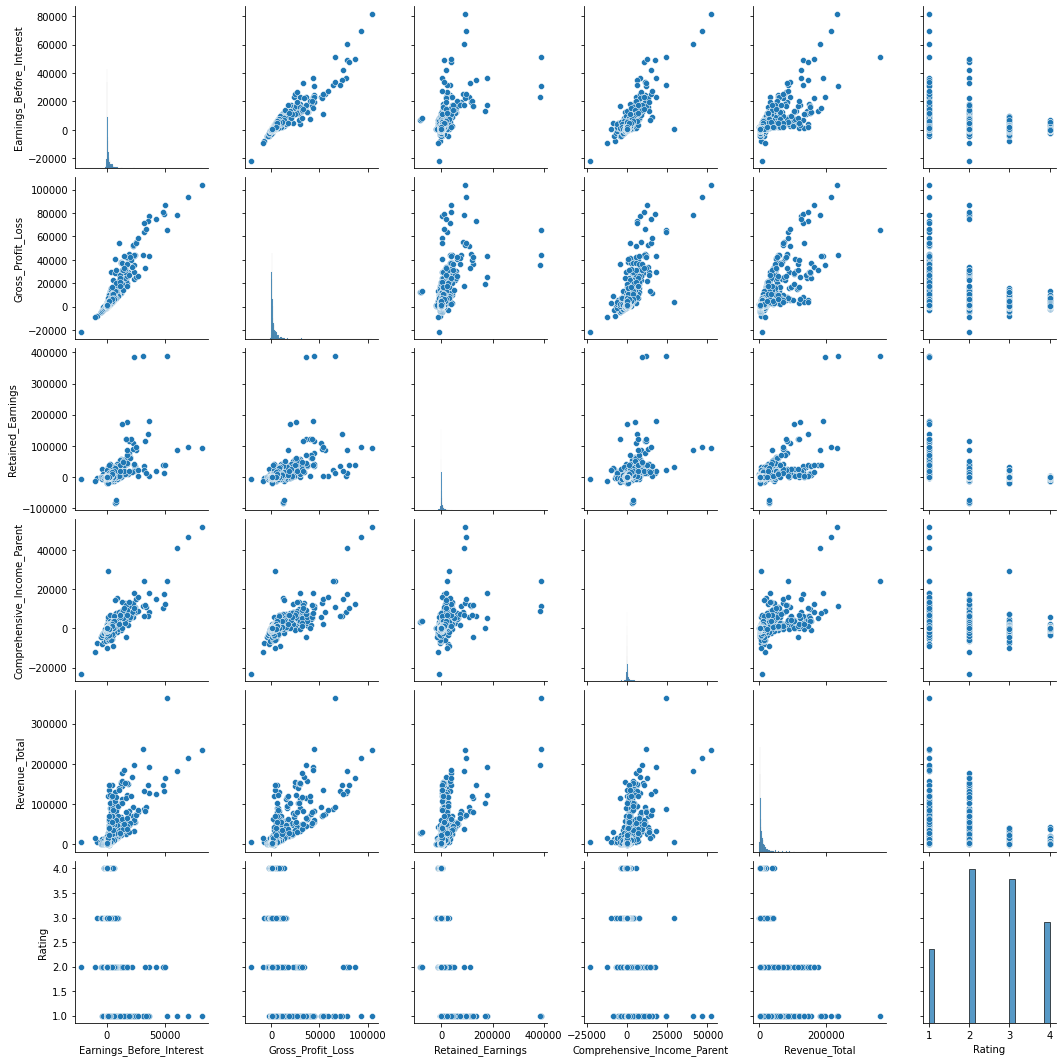

In [20]:
#set of variables related to earnings
variables4 = ['Earnings_Before_Interest', 'Gross_Profit_Loss', 'Retained_Earnings','Comprehensive_Income_Parent'
              ,'Revenue_Total','Rating']
sns.pairplot(data_clean[variables4])

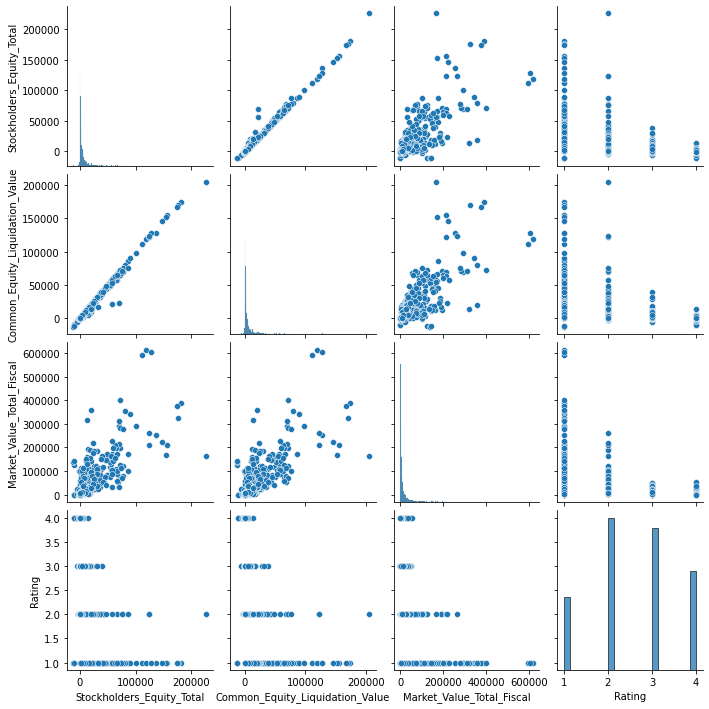

In [21]:
#set of variables related to company value
variables5 = ['Stockholders_Equity_Total', 'Common_Equity_Liquidation_Value',
       'Market_Value_Total_Fiscal','Rating']
sns.pairplot(data_clean[variables5])

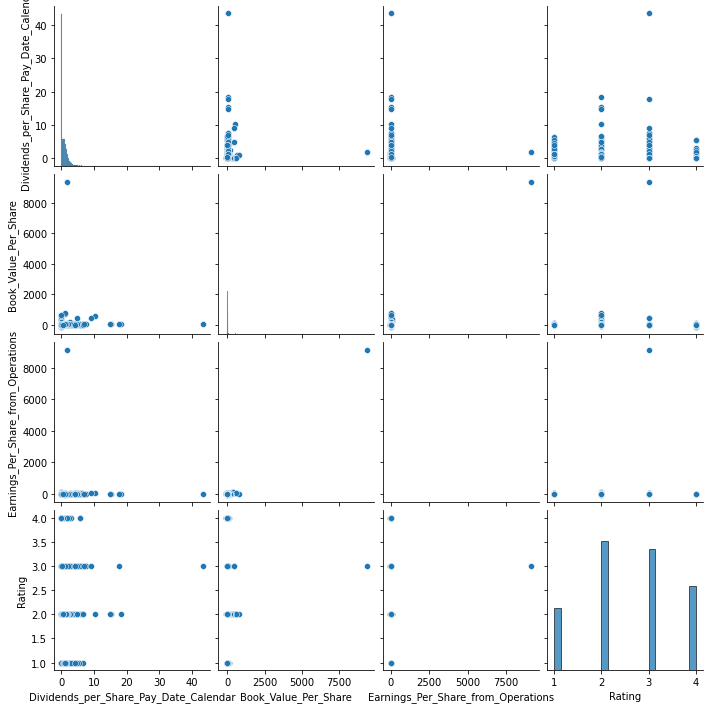

In [22]:
#set of variables related to company value per share
variables6 = ['Dividends_per_Share_Pay_Date_Calendar','Book_Value_Per_Share', 'Earnings_Per_Share_from_Operations','Rating']
sns.pairplot(data_clean[variables6])

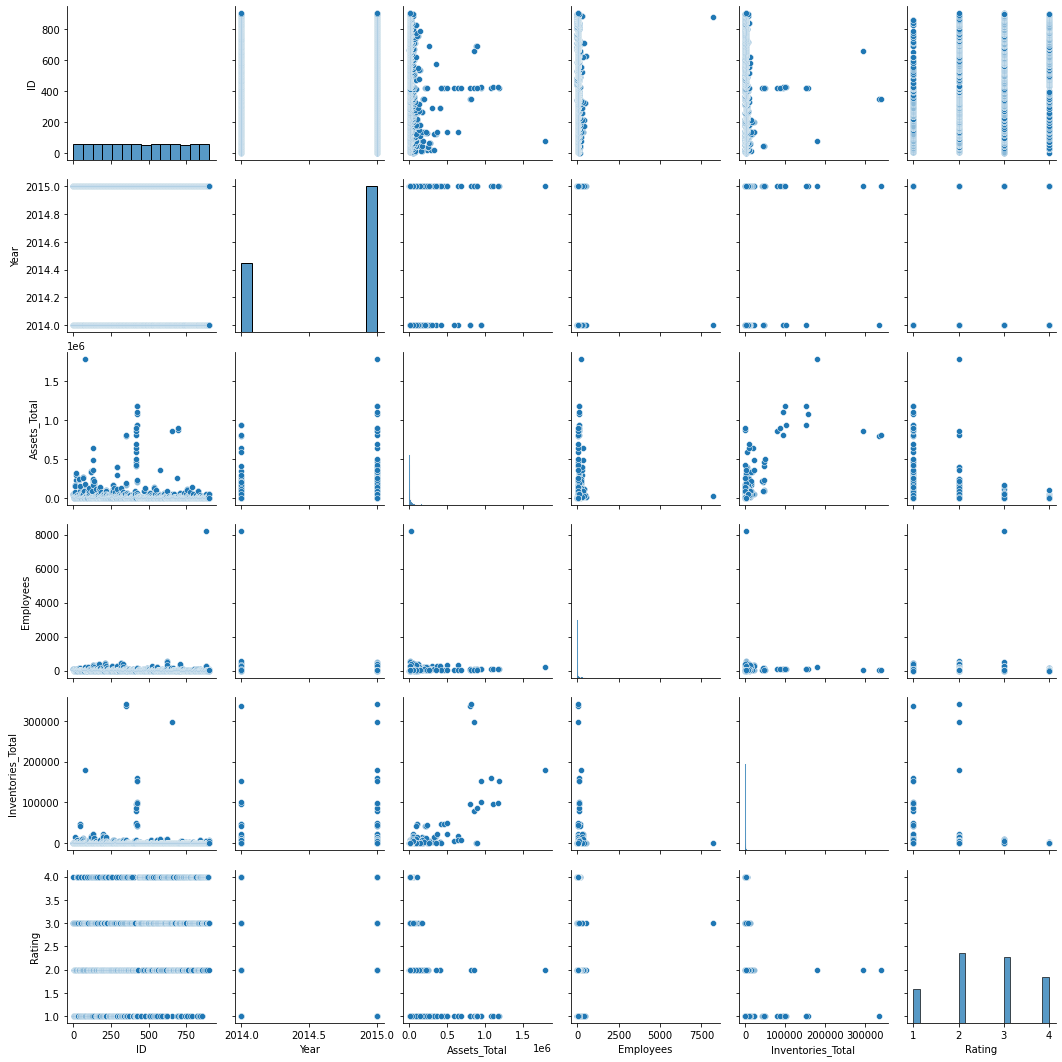

In [23]:
#set of variables
variables7 = ['ID', 'Year','Assets_Total','Employees', 'Inventories_Total','Rating']
sns.pairplot(data_clean[variables7])

#### Non-linear pattern

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


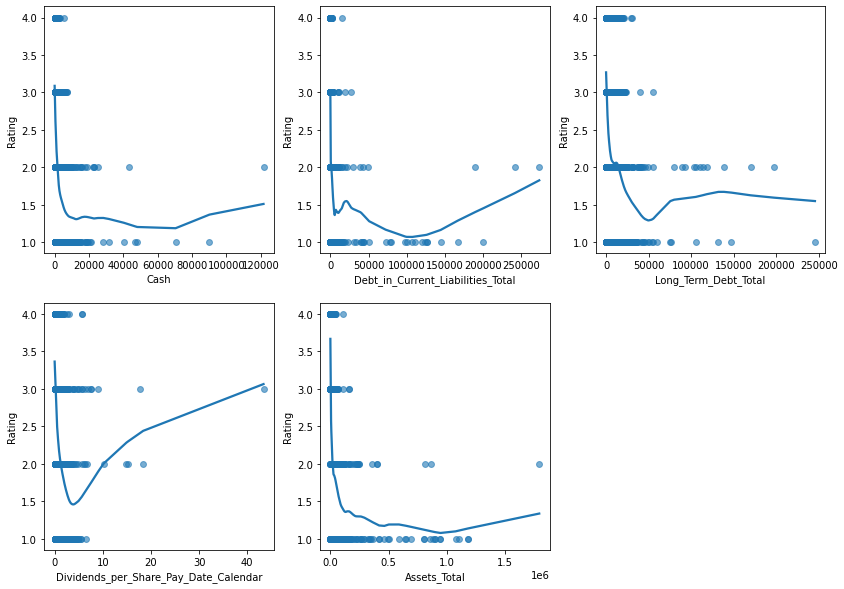

In [24]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,3,1)
sns.regplot(data_clean['Cash'], data_clean['Rating'], lowess=True, scatter_kws={'s': 35, 'alpha': 0.6})
ax1.set_xlabel('Cash')
ax1.set_ylabel('Rating')

ax2 = fig.add_subplot(2,3,2)
sns.regplot(data_clean['Debt_in_Current_Liabilities_Total'], data_clean['Rating'], lowess=True, scatter_kws={'s': 35, 'alpha': 0.6})
ax2.set_xlabel('Debt_in_Current_Liabilities_Total')
ax2.set_ylabel('Rating')

ax3 = fig.add_subplot(2,3,3)
sns.regplot(data_clean['Long_Term_Debt_Total'], data_clean['Rating'], lowess=True, scatter_kws={'s': 35, 'alpha': 0.6})
ax3.set_xlabel('Long_Term_Debt_Total')
ax3.set_ylabel('Rating')

ax4 = fig.add_subplot(2,3,4)
sns.regplot(data_clean['Dividends_per_Share_Pay_Date_Calendar'], data_clean['Rating'], lowess=True, scatter_kws={'s': 35, 'alpha': 0.6})
ax4.set_xlabel('Dividends_per_Share_Pay_Date_Calendar')
ax4.set_ylabel('Rating')

ax5 = fig.add_subplot(2,3,5)
sns.regplot(data_clean['Assets_Total'], data_clean['Rating'], lowess=True, scatter_kws={'s': 35, 'alpha': 0.6})
ax5.set_xlabel('Assets_Total')
ax5.set_ylabel('Rating')

plt.savefig('Nonlinear relationship.png')
plt.show()

### Methodology

#### Linear regression

In [25]:
import statsmodels.api as sm

In [26]:
def backward_selected(data, response):
    remaining = set(data.columns)
    x = sm.add_constant(data[remaining])
    current_score = sm.OLS(response, x).fit().rsquared_adj
    print("adj_r2 if all variables included: %f" %current_score)
    best_new_score = current_score
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            x = sm.add_constant(data[list(remaining^{candidate})]) 
            score = sm.OLS(response, x).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("deleting %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            current_score = best_new_score
    x = sm.add_constant(data[remaining])
    model = sm.OLS(response, x).fit()
    print("final model include variables %s, with adj_r2 of %f" %(remaining, model.rsquared_adj))
    return model

In [27]:
backward_selected(X_train,y_train)

/var/folders/n0/xw6g2kgs5w144rl4gvd64kcm0000gn/T/ipykernel_13414/1176581974.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x = sm.add_constant(data[remaining])


adj_r2 if all variables included: 0.463126
deleting Interest_and_Related_Expense_Total increases adj_r2 from 0.463126 to 0.463477
deleting Cash increases adj_r2 from 0.463477 to 0.463827
deleting Year increases adj_r2 from 0.463827 to 0.464175
deleting Gross_Profit_Loss increases adj_r2 from 0.464175 to 0.464486
deleting Retained_Earnings increases adj_r2 from 0.464486 to 0.464647
deleting Assets_Total increases adj_r2 from 0.464647 to 0.464825
deleting EBTI_over_total_asset increases adj_r2 from 0.464825 to 0.464895
deleting gross_profit_over_rev increases adj_r2 from 0.464895 to 0.464960
deleting Revenue_Total increases adj_r2 from 0.464960 to 0.464960
deleting Sales_over_Turnover_Net increases adj_r2 from 0.464960 to 0.465228
final model include variables {'EBTI_over_REV', 'Comprehensive_Income_Parent', 'Earnings_Per_Share_from_Operations', 'Stockholders_Equity_Total', 'Book_Value_Per_Share', 'Operating_Activities_Net_Cash_Flow', 'ID', 'Liabilities_Total', 'Financing_Activities_Net_

/var/folders/n0/xw6g2kgs5w144rl4gvd64kcm0000gn/T/ipykernel_13414/1176581974.py:19: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x = sm.add_constant(data[remaining])


In [28]:
x_train = X_train [['Market_Value_Total_Fiscal', 'ID', 'Employees', 'Financing_Activities_Net_Cash_Flow', 
                      'Stockholders_Equity_Total', 'Earnings_Before_Interest', 'Long_Term_Debt_Total', 
                      'total_asset_over_total_liabilities', 'Debt_in_Current_Liabilities_Total', 
                      'Book_Value_Per_Share', 'Inventories_Total', 'Operating_Activities_Net_Cash_Flow', 
                      'EBTI_over_REV', 'Common_Equity_Liquidation_Value', 'Net_Cash_Flow',
                      'Earnings_Per_Share_from_Operations', 'Liabilities_Total', 
                      'Total_debt_over_total_asset', 'Comprehensive_Income_Parent', 
                      'Dividends_per_Share_Pay_Date_Calendar']]
x_train = sm.add_constant(x_train, prepend=True)
model = sm.OLS(y_train, x_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     68.68
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.66e-196
Time:                        12:09:34   Log-Likelihood:                -1706.2
No. Observations:                1557   AIC:                             3454.
Df Residuals:                    1536   BIC:                             3567.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [29]:
#hypothesis testing
#set significant level 5% 
insig_variables = model.pvalues[model.pvalues >= 0.05]
insig_variables.round(4)

Stockholders_Equity_Total          0.0894
Book_Value_Per_Share               0.2597
Inventories_Total                  0.0798
Common_Equity_Liquidation_Value    0.0765
Comprehensive_Income_Parent        0.0693
dtype: float64

In [30]:
#remove of insignificant and invalid variables (i.e., variables doesn't have predictive ability)
predictors2 = ['Market_Value_Total_Fiscal', 'Employees', 'Financing_Activities_Net_Cash_Flow', 
                      'Earnings_Before_Interest', 'Long_Term_Debt_Total', 
                      'total_asset_over_total_liabilities', 'Debt_in_Current_Liabilities_Total', 
                      'Operating_Activities_Net_Cash_Flow', 
                      'EBTI_over_REV', 'Net_Cash_Flow',
                      'Earnings_Per_Share_from_Operations', 'Liabilities_Total', 
                      'Total_debt_over_total_asset', 
                      'Dividends_per_Share_Pay_Date_Calendar']
x_train_2 = X_train [predictors2]
x_train_2 = sm.add_constant(x_train_2, prepend=True)
model_2 = sm.OLS(y_train, x_train_2).fit()

print(model_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     81.95
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.05e-174
Time:                        12:09:34   Log-Likelihood:                -1770.6
No. Observations:                1557   AIC:                             3571.
Df Residuals:                    1542   BIC:                             3651.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [31]:
#remove of collinear variables 
predictors3 = ['Market_Value_Total_Fiscal', 'Financing_Activities_Net_Cash_Flow', 
                      'Earnings_Before_Interest', 'Long_Term_Debt_Total', 
                        'Debt_in_Current_Liabilities_Total', 
                      'Operating_Activities_Net_Cash_Flow', 
                      'EBTI_over_REV', 'Net_Cash_Flow', 'Liabilities_Total', 
                      'Total_debt_over_total_asset', 
                      'Dividends_per_Share_Pay_Date_Calendar']
x_train_3 = X_train [predictors3]
x_train_3 = sm.add_constant(x_train_3, prepend=True)
model_3 = sm.OLS(y_train, x_train_3).fit()

print(model_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     95.15
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.44e-165
Time:                        12:09:34   Log-Likelihood:                -1800.9
No. Observations:                1557   AIC:                             3626.
Df Residuals:                    1545   BIC:                             3690.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### Model performance in validation set

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
#Model 2
x_val_2 = X_val[predictors2]
x_val_2 = sm.add_constant(x_val_2, prepend=True)
predictions2 = model_2.predict(x_val_2)
predictions2_train = model_2.predict(x_train_2)

mae2_train = mean_absolute_error(y_train, predictions2_train)
mae2 = mean_absolute_error(y_val, predictions2)

print(mae2.round(4))
print(mae2_train.round(4))

0.6021
0.6073


In [34]:
x_val_3 = X_val[predictors3]
x_val_3 = sm.add_constant(x_val_3, prepend=True)
predictions3 = model_3.predict(x_val_3)
predictions3_train = model_3.predict(x_train_3)

mae3 = mean_absolute_error(y_val, predictions3)
mae3_train = mean_absolute_error(y_train,predictions3_train)

print(mae3.round(4))
print(mae3_train.round(4))

0.6166
0.6141


In [35]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, predictions3))
rmse

0.778234716680744

#### The KNN regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
def knn_test(predictors): #valuating the model with number of K 
    
    neighbours=np.arange(1, 51)
    best_score = np.inf #initialising the first score for comparing to the best score in the first iteriation 
    
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': X_train[predictors].cov()})
        knn.fit(X_train[predictors], y_train)
        predictions = knn.predict(X_val[predictors])
        v_score = mean_absolute_error(y_val, predictions)
        # use the cv score for model selection
        if v_score <= best_score:
            best_score = v_score
            best_knn = knn
    
    knn = best_knn
    # train the selected model with the whole train set
    knn.fit(X_train[predictors], y_train)
    # Predict the test data with the selected and re-estimated model
    predictions = knn.predict(X_val[predictors])
    v_mae = best_score
    print('Chosen K: {}'.format(knn.n_neighbors))
    
    return v_mae

In [38]:
variable_corr = corr_matrix['Rating'].abs().sort_values(ascending = False).index
variable_corr = variable_corr.drop('Sales_over_Turnover_Net') #remove one of prefect collinear variables
variable_corr = variable_corr.drop('Rating') #drop itself 
variable_corr = variable_corr.drop('ID') #invalid variable 
variable_corr = variable_corr.drop('Year') #invalid variable

In [39]:
knn_predictors = []
new_v_mae = np.inf
for i in variable_corr :
    knn_predictors += [i]
    print('Set of predictors is : {}'.format(knn_predictors))
    v_mae = knn_test(knn_predictors)
    print('Validation MAE : {}'.format(v_mae.round(4)))
    if len(knn_predictors) >= 5 :
        if v_mae <= new_v_mae:
            new_v_mae = v_mae
        else :
            break            

Set of predictors is : ['Market_Value_Total_Fiscal']
Chosen K: 35
Validation MAE : 0.516
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss']
Chosen K: 9
Validation MAE : 0.513
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value']
Chosen K: 3
Validation MAE : 0.5222
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 'Stockholders_Equity_Total']
Chosen K: 1
Validation MAE : 0.5222
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 'Stockholders_Equity_Total', 'Earnings_Before_Interest']
Chosen K: 1
Validation MAE : 0.4547
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 'Stockholders_Equity_Total', 'Earnings_Before_Interest', 'Revenue_Total']
Chosen K: 1
Validation MAE : 0.395
Set of predictors is : ['Market_Value_Total_Fiscal', 'Gross_Pro

In [40]:
knn_predictors1 = ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 
              'Stockholders_Equity_Total', 'Earnings_Before_Interest', 'Revenue_Total', 
              'Dividends_per_Share_Pay_Date_Calendar', 'Operating_Activities_Net_Cash_Flow', 'Retained_Earnings']
v_mae1 = knn_test(knn_predictors1)
print('Validation MAE : {}'.format(v_mae1.round(4)))

Chosen K: 1
Validation MAE : 0.3179


In [41]:
knn_predictors2 = ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 
              'Stockholders_Equity_Total', 'Earnings_Before_Interest', 'Revenue_Total', 
              'Dividends_per_Share_Pay_Date_Calendar', 'Operating_Activities_Net_Cash_Flow', 
              'Retained_Earnings','Cash','Debt_in_Current_Liabilities_Total','Long_Term_Debt_Total',
              'Assets_Total']

v_mae2 = knn_test(knn_predictors2)
print('Validation MAE : {}'.format(v_mae2.round(4)))

Chosen K: 1
Validation MAE : 0.2832


In [42]:
k = 1
knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': X_train[knn_predictors2].cov()})
knn.fit(X_train[knn_predictors2], y_train)
knn_predictions = knn.predict(X_val[knn_predictors2])

rmse = np.sqrt(mean_squared_error(y_val, knn_predictions))
rmse

0.6223208473080583

#### A third model - logistic regression

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [44]:
from sklearn.linear_model import LogisticRegression

np.random.seed(314151) # seet the random state to reproduce results
model = LogisticRegression()
model = LogisticRegression(max_iter = 10000)

sfs1 = SFS(model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=3,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished

[2023-04-09 12:10:10] Features: 1/5 -- score: 0.4868167202572347[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    2.9s finished

[2023-04-09 12:10:13] Features: 2/5 -- score: 0.5318039409679282[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parall

In [45]:
#get the list of selected predictors
selected_predictors = [variables[index] for index in sfs1.k_feature_idx_]
selected_predictors

['Gross_Profit_Loss',
 'Retained_Earnings',
 'Total_debt_over_total_asset',
 'Dividends_per_Share_Pay_Date_Calendar',
 'Earnings_Per_Share_from_Operations']

In [46]:
log_predictors = ['Gross_Profit_Loss',
 'Retained_Earnings',
 'Total_debt_over_total_asset',
 'Dividends_per_Share_Pay_Date_Calendar',
 'Earnings_Per_Share_from_Operations'] 

#logistic regression multinomial 
log = LogisticRegression(multi_class = 'multinomial')
log.fit(X_train[log_predictors], y_train)

log_predict_train = log.predict(X_train[log_predictors])
log_predict_val = log.predict(X_val[log_predictors])

#mae
mae_val = mean_absolute_error(y_val, log_predict_val)
print(mae_val)


0.6724470134874759


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import roc_auc_score
predictions1 = log.predict_proba(X_val[log_predictors])
roc_auc_score(y_val, predictions1, multi_class = 'ovr')

0.7691633031271534

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_val, log_predict_val))
print(classification_report(y_train, log_predict_train))

              precision    recall  f1-score   support

           1       0.39      0.33      0.36        82
           2       0.45      0.78      0.57       178
           3       0.44      0.27      0.34       158
           4       0.70      0.30      0.42       101

    accuracy                           0.46       519
   macro avg       0.49      0.42      0.42       519
weighted avg       0.48      0.46      0.43       519

              precision    recall  f1-score   support

           1       0.44      0.40      0.42       244
           2       0.43      0.77      0.55       496
           3       0.41      0.27      0.33       477
           4       0.73      0.29      0.42       340

    accuracy                           0.45      1557
   macro avg       0.50      0.43      0.43      1557
weighted avg       0.49      0.45      0.43      1557



In [49]:
rmse_val = np.sqrt(mean_squared_error(y_val, log_predict_val))
print(rmse_val)

0.9961389817217212


#### A single model

In [50]:
## Linear regression
x_train_4 = sm.add_constant(X_train['Market_Value_Total_Fiscal'], prepend=True)
model_4 = sm.OLS(y_train, x_train_4).fit()
print(model_4.summary())

predictions4 = model_4.predict(sm.add_constant(X_val['Market_Value_Total_Fiscal']))
mae_val = mean_absolute_error(y_val, predictions4)
print(mae_val.round(4))

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     332.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.56e-67
Time:                        12:12:02   Log-Likelihood:                -2052.6
No. Observations:                1557   AIC:                             4109.
Df Residuals:                    1555   BIC:                             4120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

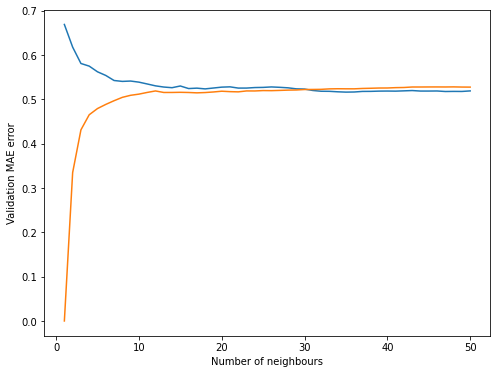

In [51]:
values1 = np.arange(1, 51)
rmse1 = []
train_rmse1 = []
mae1 = []
train_mae1 = []
for k in values1:
    # 1. Specify and fit the model (there is no need to store it)
    knn1 = KNeighborsRegressor(n_neighbors = k) 
    knn1.fit(X_train[['Market_Value_Total_Fiscal']], y_train)
    # 2. Compute predictions for the test data
    predictions1 = knn1.predict(X_val[['Market_Value_Total_Fiscal']])
    train_predictions1 = knn1.predict(X_train[['Market_Value_Total_Fiscal']])
    # 3. Compute the MAE 
    MAE1 = mean_absolute_error(y_val, predictions1)
    mae1.append(MAE1)
    train_MAE1 = mean_absolute_error(y_train, train_predictions1)
    train_mae1.append(train_MAE1)
    
fig = plt.figure(figsize=(8,6))
plt.plot (values1, mae1, label = 'Validation MAE Error')
plt.plot (values1, train_mae1, label = 'Train MAE Error') #how well do the model perform - test set assess final model 
plt.xlabel ('Number of neighbours')
plt.ylabel ('Validation MAE error')
plt.show()

In [52]:
mae1[np.argmin(mae1)]

0.5160473437930085

In [53]:
lr = LogisticRegression()
lr.fit(X_train[['Market_Value_Total_Fiscal']], y_train)
predict_val = lr.predict(X_val[['Market_Value_Total_Fiscal']])

#mae
lr_mae_val = mean_absolute_error(y_val, predict_val)
print(lr_mae_val.round(4))

1.5356


### Final performance in test set

In [54]:
#knn model
covariate = ['Market_Value_Total_Fiscal', 'Gross_Profit_Loss', 'Common_Equity_Liquidation_Value', 
              'Stockholders_Equity_Total', 'Earnings_Before_Interest', 'Revenue_Total', 
              'Dividends_per_Share_Pay_Date_Calendar', 'Operating_Activities_Net_Cash_Flow', 
              'Retained_Earnings','Cash','Debt_in_Current_Liabilities_Total','Long_Term_Debt_Total',
              'Assets_Total']

knn = KNeighborsRegressor(n_neighbors = 1, metric='mahalanobis', metric_params={'V': X_train[covariate].cov()})
knn.fit(X_train[covariate], y_train)
predictions2 = knn.predict(X_test[covariate])
v_score = mean_absolute_error(y_test, predictions2)
v_score.round(4)

0.2331

In [55]:
#Linear model
x_test_3 = X_test[predictors3]
x_test_3 = sm.add_constant(x_test_3, prepend=True)
test_predictions = model_3.predict(x_test_3)
train_predictions = model_3.predict(x_train_3)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(test_mae.round(4))
print(train_mae.round(4))

0.6204
0.6141


In [56]:
model_3.params

const                                      2.313351
Market_Value_Total_Fiscal                 -0.000014
Financing_Activities_Net_Cash_Flow      -604.794592
Earnings_Before_Interest                   0.000068
Long_Term_Debt_Total                      -0.000014
Debt_in_Current_Liabilities_Total          0.000017
Operating_Activities_Net_Cash_Flow      -604.794567
EBTI_over_REV                             -0.308991
Net_Cash_Flow                            604.794583
Liabilities_Total                         -0.000002
Total_debt_over_total_asset                1.782209
Dividends_per_Share_Pay_Date_Calendar     -0.154205
dtype: float64